# Predict Salary

## Imports

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import MaxNLocator

#imports to cALCUALTE LOSS
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


## Load data and clean

In [47]:
data = pd.read_csv('nba2k-full.csv')


data['weight_cleaned'] = data['weight'].apply(
    lambda x: float(x.split('/')[1].replace('kg.', '').strip()))
data['salary_cleaned'] = data['salary'].replace(
    {'\$': '', ',': '', ' ': ''}, regex=True).astype(float)
data['height_cleaned'] = data['height'].apply(
    lambda x: float(x.split('/')[1].strip()))
data['team_numerical'] = pd.factorize(data['team'])[0]


## Predict a player's salary given their rating in the NBA 2k video game

In [48]:
X = data[['rating', 'weight_cleaned', 'height_cleaned']].values
Y = data['salary_cleaned'].values

model = LinearRegression()
model.fit(X, Y)

# Kyrie Irving,91,#11,Brooklyn Nets,G,03/23/92,6-2 / 1.88,180 lbs. / 81.6 kg.,$31742000,Australia,2011,1,1,Duke,NBA2k20

print("Prediction Kyrie Irving: $", model.predict([[91, 81.6, 1.88]])[0])

mse_3_features = mean_squared_error(Y, model.predict(X))
mae = mean_absolute_error(Y, model.predict(X))
r2 = r2_score(Y, model.predict(X))

print("Mean Squared Error: ", mse_3_features)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", r2)

Prediction Kyrie Irving: $ 28611134.2801982
Mean Squared Error:  35088024007413.617
Mean Absolute Error:  4239803.505180412
R2 Score:  0.6582482677973298


### More features

In [57]:
X = data[['rating', 'height_cleaned', 'team_numerical']].values
Y = data['salary_cleaned'].values

model = LinearRegression()
model.fit(X, Y)

# Kyrie Irving,91,#11,Brooklyn Nets,G,03/23/92,6-2 / 1.88,180 lbs. / 81.6 kg.,$31742000,Australia,2011,1,1,Duke,NBA2k20

print("Prediction Kyrie Irving: $", model.predict([[91,  1.88, 3]])[0])

mse = mean_squared_error(Y, model.predict(X))
mae = mean_absolute_error(Y, model.predict(X))
r2 = r2_score(Y, model.predict(X))

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", r2)

print("Difference mse: ", mse - mse_3_features)
#use max() to find the best mse and print what best was

if mse > mse_3_features:
    print("The best mse more features: ")
else: 
    print("The best mse 3 features: ")

Prediction Kyrie Irving: $ 28285511.281254575
Mean Squared Error:  35160920131952.72
Mean Absolute Error:  4242677.219419138
R2 Score:  0.6575382712233752
Difference mse:  72896124539.10156
The best mse more features: 


### Plotting

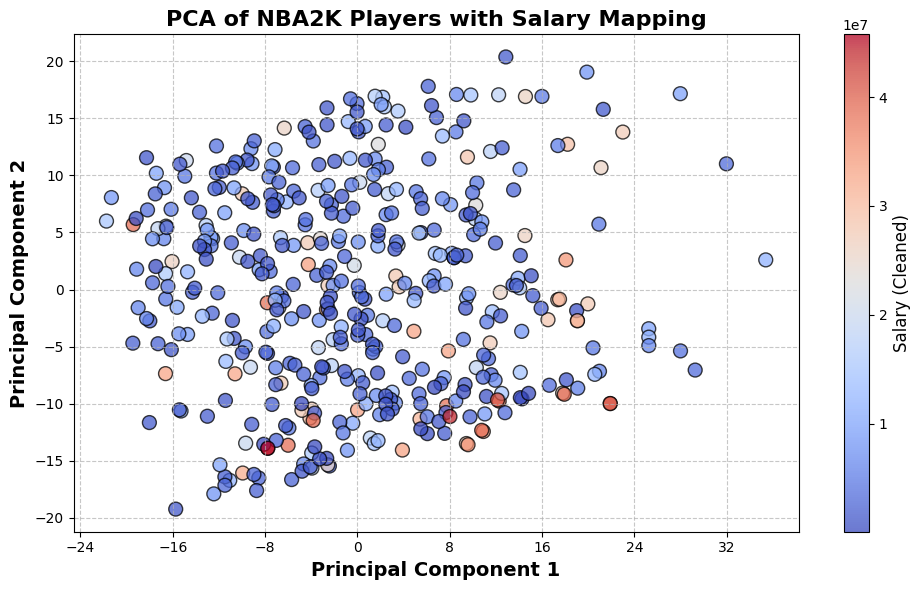

In [50]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

model = LinearRegression()
model.fit(X_pca, Y)

Y_pred = model.predict(X_pca)

plt.figure(figsize=(10, 6))

# Use a continuous colormap to color the points based on Y (salary)
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y,
                 cmap='coolwarm', edgecolor='k', s=100, alpha=0.75)

# Add color bar to the right
cbar = plt.colorbar(sc)
cbar.set_label('Salary (Cleaned)', fontsize=12)

# Customizations for aesthetics
plt.xlabel('Principal Component 1', fontsize=14, weight='bold')
plt.ylabel('Principal Component 2', fontsize=14, weight='bold')
plt.title('PCA of NBA2K Players with Salary Mapping',
          fontsize=16, weight='bold')

# Adding a grid for better visual separation
plt.grid(True, linestyle='--', alpha=0.7)

# Set major ticks on both axes for clearer interpretation
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Show the plot
plt.tight_layout()
plt.show()